# Flow360 API Quickstart

Flow360 can be automatically driven via our powerful Python API. All the case setup parameters available in the WebUI are available in the Python API.

By starting from the same  [evtol_quickstart_grouped.csm](https://simcloud-public-1.s3.amazonaws.com/quickstart/evtol_quickstart_grouped.csm), the EVTOL quickstart case shown previously can be easily launched.

## Import necessary modules

First, we import the required modules from the Flow360 library:

In [1]:
from matplotlib.pyplot import show

import flow360 as fl
from flow360.examples import EVTOL

## Step 1: Create a new project

Create a new project from a predefined geometry file in the EVTOL example. This initializes a project with the specified geometry and assigns it a name.

In [2]:
EVTOL.get_files()

project = fl.Project.from_geometry(
    EVTOL.geometry,
    name="Python Project (Geometry, from file)",
)
geo = project.geometry

Output()

[14:09:43] INFO: Geometry successfully submitted:                                                                  
                   type        = Geometry                                                                          
                   name        = Python Project (Geometry, from file)                                              
                   id          = geo-4a2412d4-786e-4aa6-a7d1-1242a3e8ae63                                          
                   status      = uploaded                                                                          
                   project id  = prj-8d95954b-152d-4574-9f87-63e755a2bcb1                                          
           

           INFO: Waiting for geometry to be processed.

Output()

## Step 2: Group faces by tag

Group faces by a specific tag for easier reference in defining `Surface` objects:

In [3]:
geo.group_faces_by_tag("groupName")

[14:11:32] INFO: Regrouping face entities under `groupName` tag (previous `_color`).

## Step 3: Define simulation parameters

Define simulation parameters within a specific unit system. This includes:
- Meshing parameters (boundary layer and maximum edge length)
- Reference geometry parameters
- Operating conditions (velocity and angle of attack)
- Time-stepping configuration
- Boundary condition models
- Output parameters

In [4]:
with fl.SI_unit_system:
    far_field_zone = fl.AutomatedFarfield()

    params = fl.SimulationParams(
        meshing=fl.MeshingParams(
            defaults=fl.MeshingDefaults(
                boundary_layer_first_layer_thickness=0.001,
                surface_max_edge_length=1,
            ),
            volume_zones=[far_field_zone],
        ),
        operating_condition=fl.AerospaceCondition(
            velocity_magnitude=100,
            alpha=5 * fl.u.deg,
        ),
        time_stepping=fl.Steady(max_steps=1000),
        models=[
            fl.Wall(surfaces=[geo["*"]]),
            fl.Freestream(surfaces=[far_field_zone.farfield]),
        ],
        outputs=[
            fl.SurfaceOutput(
                surfaces=geo["*"],
                output_fields=["Cp", "Cf", "yPlus", "CfVec"],
            )
        ],
    )

           INFO: using: SI unit system for unit inference.

## Step 4: Run the simulation

Run the simulation case with the specified parameters:

In [5]:
case = project.run_case(params=params, name="Case of EVTOL from Python")

           INFO: using: SI unit system for unit inference.

[14:11:35] INFO: Successfully submitted:                                                                           
                   type        = Case                                                                              
                   name        = Case of EVTOL from Python                                                         
                   id          = case-9a16e08c-935c-41bd-8ffc-a9095f7ba0e6                                         
                   status      = pending                                                                           
                   project id  = prj-8d95954b-152d-4574-9f87-63e755a2bcb1                                          
           

## Step 5: Wait for results and plot convergence

Wait for the simulation to complete and plot the lift (CL) and drag (CD) coefficient convergence:

Output()

Output()

[14:15:41] INFO: Saved to /tmp/tmpjrj0fzrd/5734bde9-ec89-4ef8-9609-75c75887efdf.csv

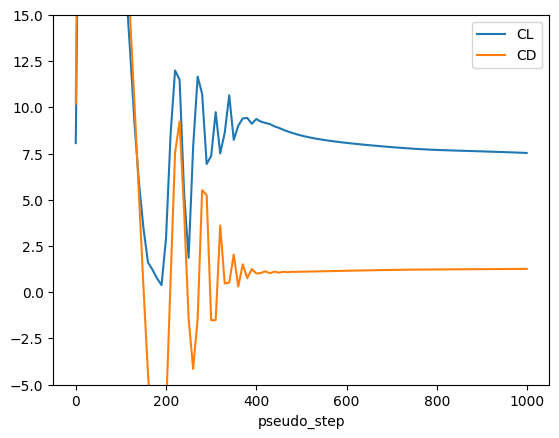

In [6]:
case = project.case
case.wait()

total_forces = case.results.total_forces.as_dataframe()
total_forces.plot("pseudo_step", ["CL", "CD"], ylim=[-5, 15])
show()